# 重回帰モデル
LinearRegressionは、係数𝑤=（𝑤0、…、𝑤𝑝）を使用して線形モデルを近似し、データセット内の観測されたターゲットと線形近似によって予測されたターゲットの間の残差平方和を最小化します。

たとえば、ある会社の複数の従業員を観察して、彼らの給与が経験、教育レベル、役割、彼らが働いている都市などの機能にどのように依存しているかを理解しようとすることができます。

一連の独立変数𝑦=（𝑥1、…、𝑥𝑟）に依存変数linearの線形回帰を実装する場合、𝑟は予測子の数であり、𝑦とbetweenの間の線形関係を想定します。          
### $y = w_{0} + w_{1}x_{1} + ... + w_{r}x_{r}$
この方程式は回帰方程式です。 $ w_ {0}、w_ {1}、... w_ {r} $は回帰係数です。

線形回帰では、$ b_ {0}、b_ {1}、... b_ {r} $で示される、回帰係数または単に予測された重みの推定量を計算します。 それらは推定回帰関数を定義します

###  $ \hat{y} = f(x) = b_{0} + b_{1}x_{1} + ... + b_{r}x_{r}$
この関数は、入力と出力の間の依存関係を十分にキャプチャする必要があります。

各観測の推定または予測応答$ \ hat {y} _ {i} $𝑖= 1、…、𝑛は、対応する実際の応答$ y_ {i} $に可能な限り近くする必要があります。<br>
すべての観測differences = 1、…、forの$ y_ {i} $と$ \ hat {y} _ {i} $の差は、残差と呼ばれます。<br>
回帰とは、予測される最も良い重み、つまり最小の残差に対応する重みを決定することです。<br>

最良の重みを取得するには、通常、すべての観測値の二乗残差（SSR）の合計を最小化します𝑖= 1、…、𝑛：
###  $SSR$ = 1/n*Σᵢ($y_{i} - \hat{y}_{i}$)². 
このアプローチは、通常の最小二乗法と呼ばれます。

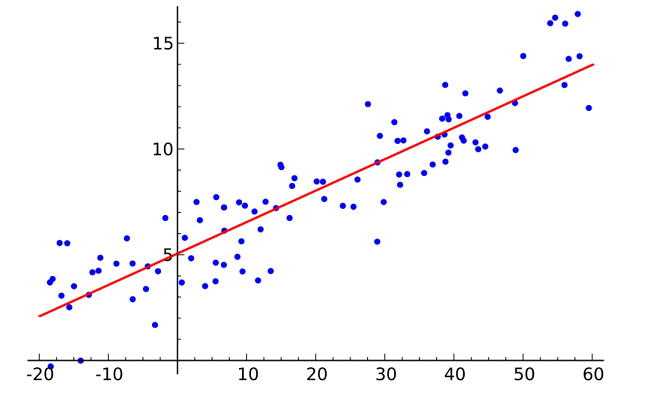

### 重回帰モデルを使った予測
それでは、実際のデータを使い、重回帰モデルを作成し、そのモデルを使い予測をしてみたいと思います。<br>

今回使用するデータは　"'california_housing_train.csv','california_housing_test.csv'の２つ<br>
これらのデータはカルフォルニアの家の平均価格とその他項目が記録されている<br>

ここで、以下のとおりの変数定義として<br>
目的変数；median_house_value(家の価格)<br>
説明変数;その他の項目<br>

学習データをもとに、重回帰モデルを作成し、作成したモデルにテストデータの目的変数を除く項目を入力し<br>
目的変数であるmedian_house_value(家の価格)を予測し、実際のテストデータの価格と予測価格との対比をグラフ化する<br>

■具体的な手順
①学習データの取り込み<br>
②学習モデルの作成<br>
③精度の計算<br>
④テストデータの取り込み<br>
⑤予測値の算出<br>
⑥実際のテストデータの価格と予測価格との対比グラフ<br>



初期設定

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import sklearn
# import LinearRegression to solve problem.
from sklearn.linear_model import LinearRegression

# r2_score:  denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is 
# predictable from the independent variable(s).
from sklearn.metrics import r2_score

In [2]:
train_data_path = 'california_housing_train.csv'
test_data_path = 'california_housing_test.csv'

学習用データの取り込みと表示

In [3]:
df = pd.read_csv(train_data_path)
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
5,-114.58,33.63,29,1387,236,671,239,3.3438,74000
6,-114.58,33.61,25,2907,680,1841,633,2.6768,82400
7,-114.59,34.83,41,812,168,375,158,1.7083,48500
8,-114.59,33.61,34,4789,1175,3134,1056,2.1782,58400
9,-114.60,34.83,46,1497,309,787,271,2.1908,48100


以下の関数は、csvファイルのデータを読み取り、numpy配列に変換するために定義した関数

In [4]:
def data_(data_path):
  return pd.read_csv(data_path).to_numpy()

Regressionクラスを定義


In [5]:
class Regression:
  #  dataは2Dのnumpy配列で、フィーチャー値（X）とラベル値（y）を含みます。 ラベル値は配列の最後の列にあります
  def __init__(self, data):
    self.data = data

  # 住宅の価値を予測するために使用された特徴の数を計算する
  def _num_of_feature_and_sample(self):
    _, feature = (self.data).shape
    return feature

  #  Xを使用してyを予測します、 各行の最初の列に1を追加します。これはバイアス係数の値を表します。
  # この作業がないと、トレーニングプロセスの終了後、超平面は常に座標原点を交差します。
  # これにより、超平面の柔軟性が低下します。
  def _get_feature_and_target_values(self):
    feature = self._num_of_feature_and_sample()
    X = self.data[:, :feature-1]
    one = np.ones(shape=(X.shape[0], 1))
    X = np.concatenate((one, X), axis=1)
    y = self.data[:, feature-1]
    return X, y

  # function to train model
  def _model(self):
    X, y = self._get_feature_and_target_values()
    reg = LinearRegression().fit(X,y)
    return reg

In [6]:
#学習データの取込
train_data = data_(train_data_path)
x_train, y_train = Regression(train_data)._get_feature_and_target_values()

In [7]:
# 学習モデルを作成
reg = Regression(train_data)._model()

In [8]:
# accuracy(精度)
print(reg.score(x_train, y_train))

0.5979431954535066


In [9]:
# テストデータの取込
test_data = data_(test_data_path)
X_test, y_test = Regression(test_data)._get_feature_and_target_values()

In [10]:
#予測値
y_predict = reg.predict(X_test)

### テストデータの重回帰モデルを使った予測結果の表示
実際の家の価格;黒色<br>
予測値での家の価格;青色<br>

Coefficients: 
 [ 0.00000000e+00 -6.24379328e+04 -3.96829600e+04  7.32503206e+02
 -4.61326672e+00  7.60160858e+01 -3.63725628e+01  6.21663265e+01
  3.86209008e+04]
Coefficient of determination: 0.34


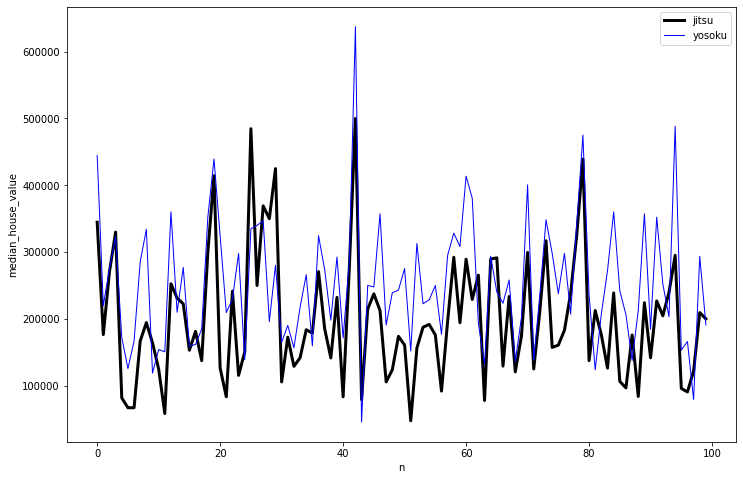

In [11]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))

# Plot outputs, 100 first data points.
x_ = np.arange(0, 100)

plt.figure(figsize=(12, 8))
plt.xlabel('n')
plt.ylabel('median_house_value')

plt.plot(x_,y_test[:100],  label='jitsu', color='black', linewidth=3)
plt.plot(x_,y_predict[:100], label='yosoku',color='blue', linewidth=1)
#plt.figure(figsize=(8, 10)) 
#plt.figure(figsize=(4, 4), dpi=50)
plt.legend()
#plt.xticks(())
#plt.yticks(())

#plt.legend()
#plt.figure(figsize=(8, 10)) 
plt.show()

### あまり精度が高くないように思える→多重共線性が発生してる説

### じゃあヒートマップを作成してみよう

In [12]:
import seaborn as sns

In [13]:
df = pd.read_csv(train_data_path)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [14]:
df.columns[:-1]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

# 経度、緯度、築年数の中央値、部屋の合計数、ベッドルームの合計数、人口、世帯、収入の中央値

In [29]:
sns.set(rc = {'figure.figsize':(16,12)})
corr = df.corr()

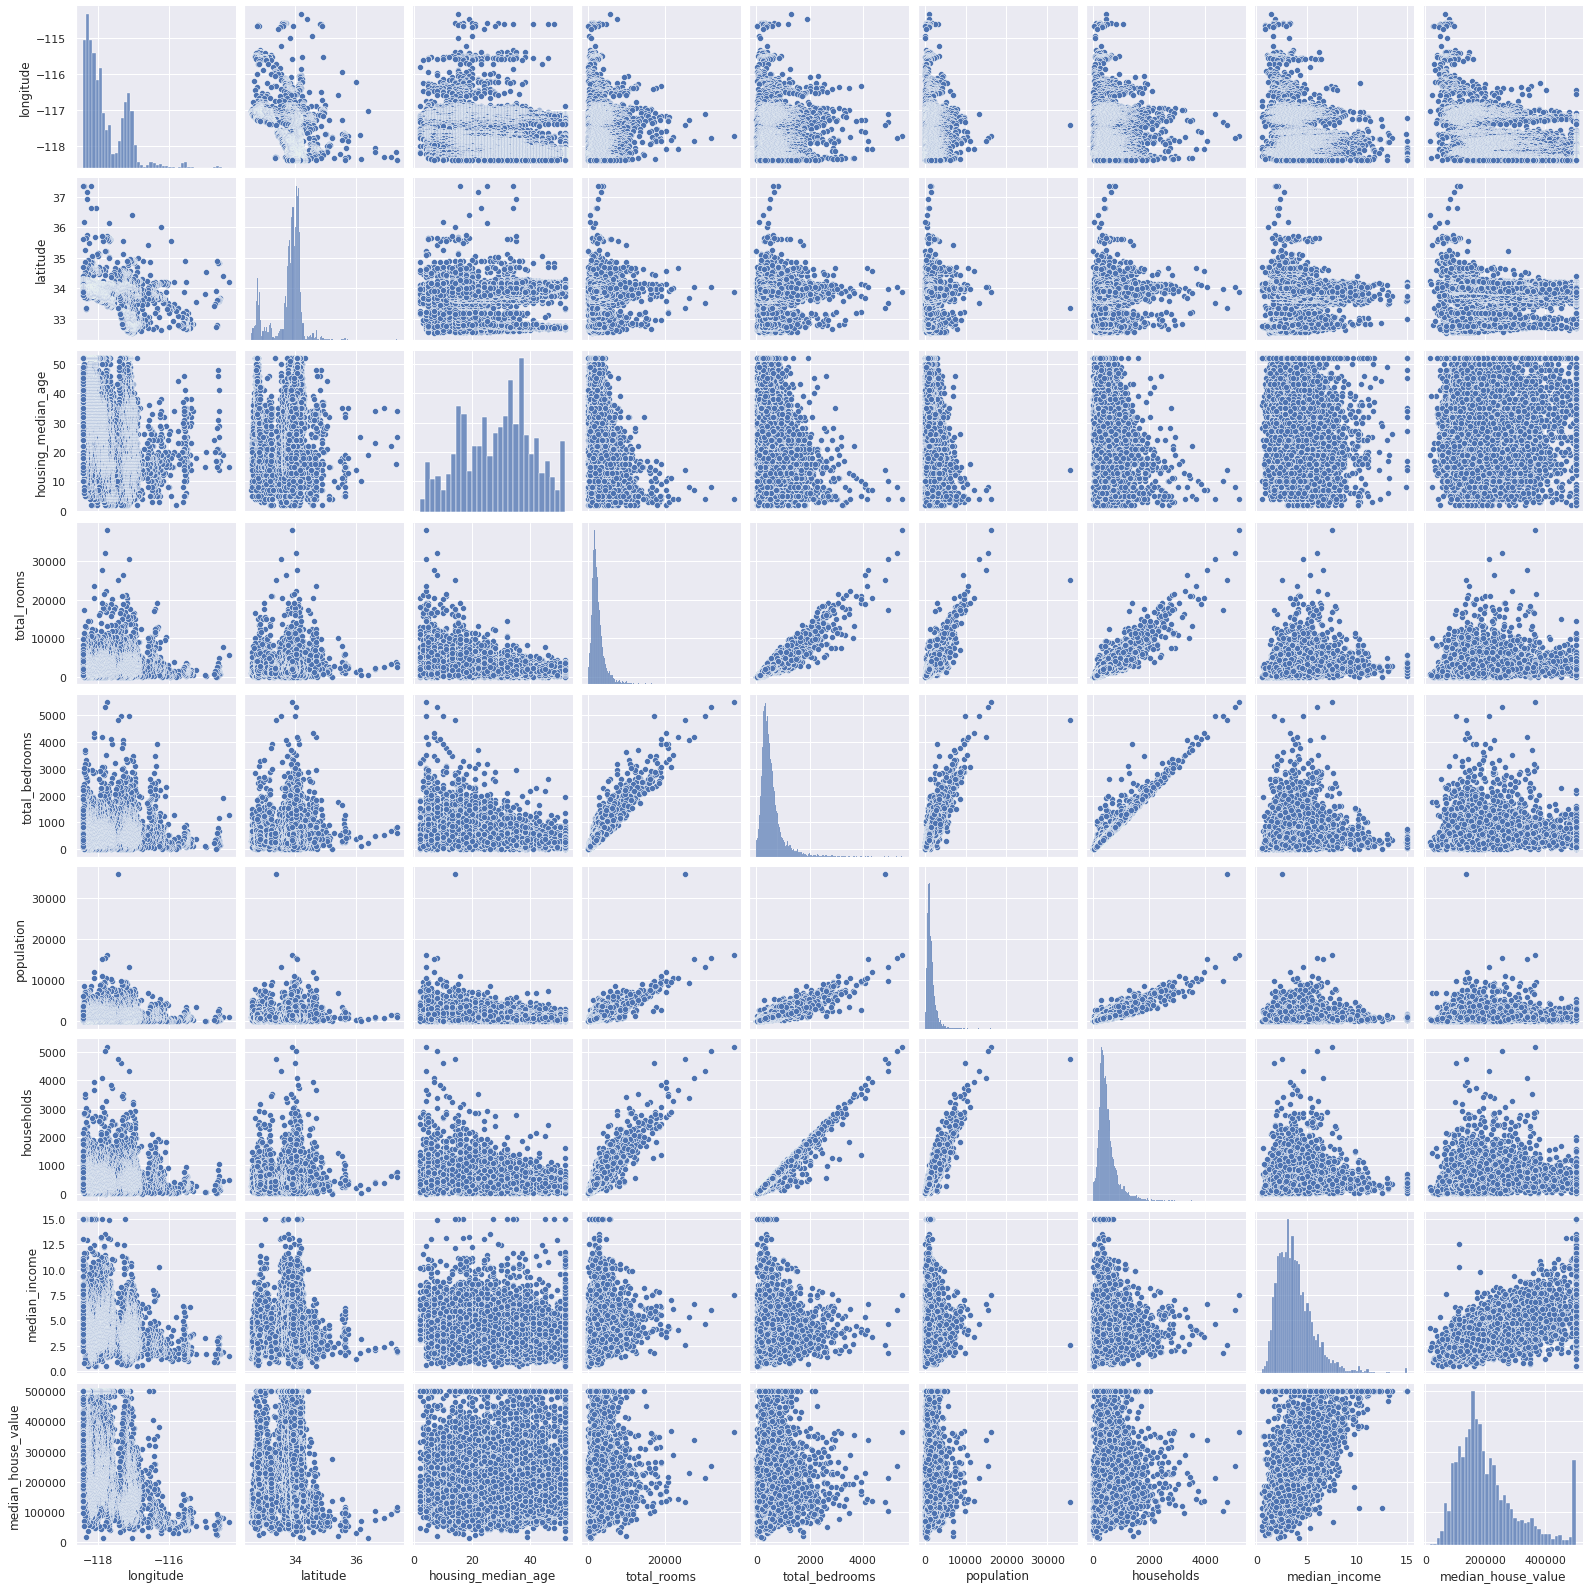

In [30]:
sns.pairplot(df)

<AxesSubplot:>

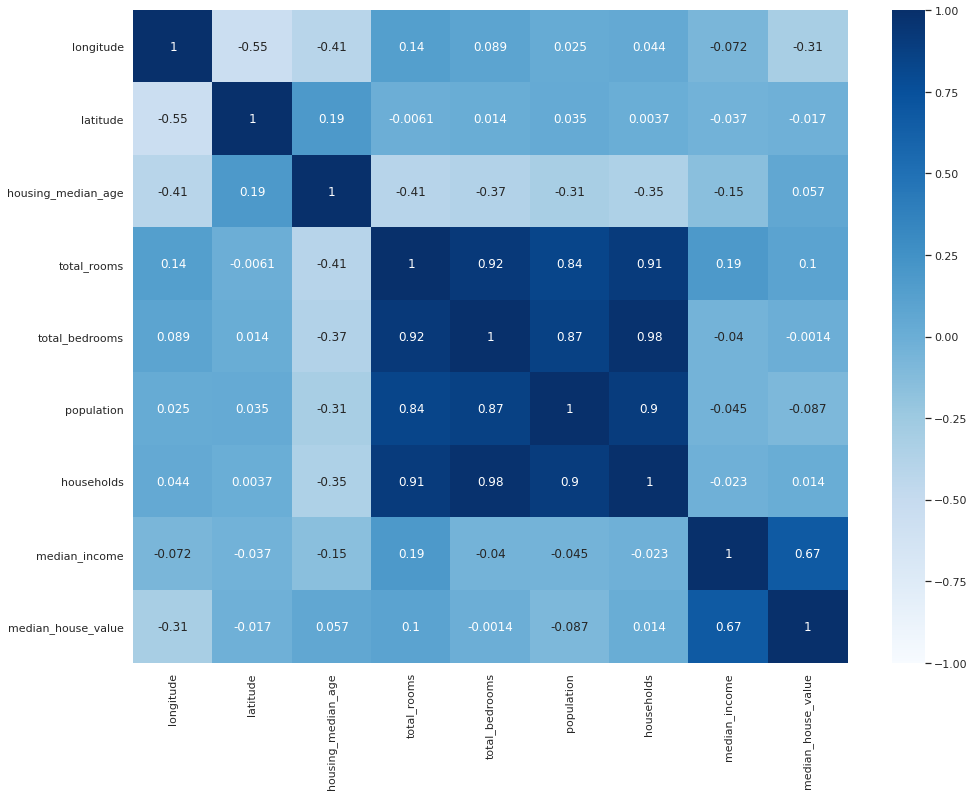

In [31]:
sns.heatmap(corr, cmap='Blues', vmin=-1, vmax=1, annot=True)

0.9超えてるとやばいよな

### 部屋数と寝室、部屋数と人口、部屋数と世帯数、寝室と人口、寝室と世帯、人口と世帯

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
lr = LinearRegression()


x = df.drop("median_house_value", axis=1).values
y = df['median_house_value'].values

# テスト用とデータを分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

# 予測モデル作成
lr.fit(x_train, y_train)
 
# 偏回帰係数
coef = pd.DataFrame({"Name":df.columns[:-1], "Coefficients":lr.coef_}).sort_values(by='Coefficients')

# 偏回帰係数
print("【偏回帰係数】", coef)
 
# 切片 (誤差)
print("切片:", lr.intercept_)

# 決定係数（トレーニングデータ）
print("決定係数(訓練):", lr.score(x_train, y_train))

# 決定係数（テストデータ）
print("決定係数(テスト):", lr.score(x_test, y_test))

【偏回帰係数】                  Name  Coefficients
0           longitude -62755.467070
1            latitude -38847.506094
5          population    -46.126607
3         total_rooms     -3.377140
4      total_bedrooms     66.555112
6          households     88.646920
2  housing_median_age    639.353846
7       median_income  38019.828192
切片: -6040270.09827097
決定係数(訓練): 0.6030661816827333
決定係数(テスト): 0.5789366239230782


# ここから多重共線性について対処していく
そもそも独立変数間は無相関が仮定されている

### 対応方法として思いつくのは、片方の変数の消去、パラメータチューニングでまとめるなど

### dropだけして分析してみる

In [46]:
df_for_heatmap = df[["longitude","latitude","households","housing_median_age","median_income","median_house_value"]]
corr = df_for_heatmap.corr()

<AxesSubplot:>

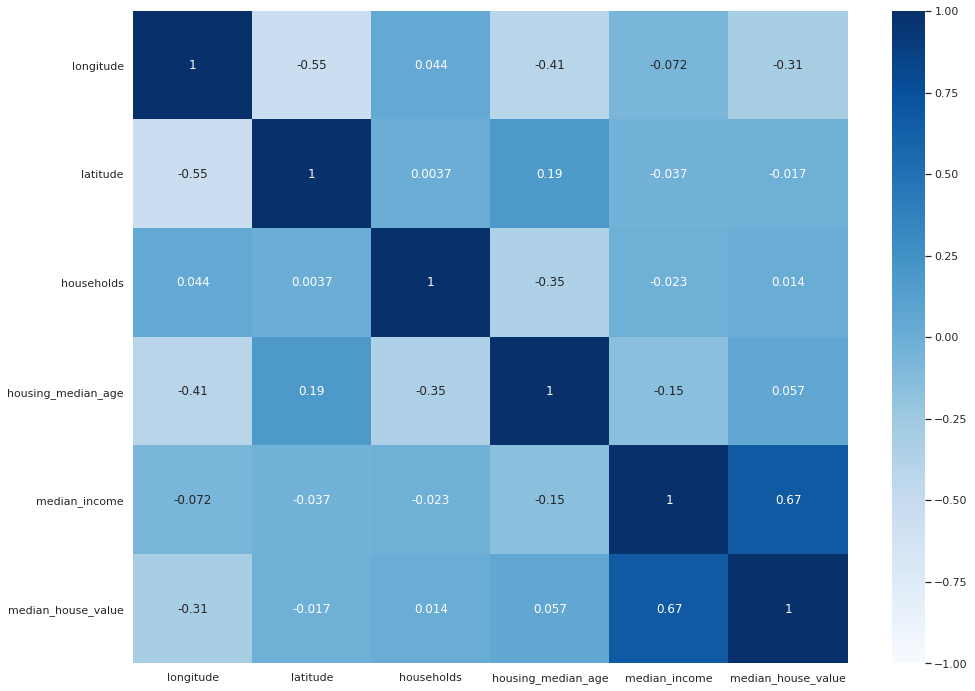

In [47]:
sns.heatmap(corr, cmap='Blues', vmin=-1, vmax=1, annot=True)

In [22]:
x = df.drop(["total_bedrooms","population","total_rooms","median_house_value"], axis=1).values
y = df['median_house_value'].values

In [23]:

# テスト用とデータを分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

# 予測モデル作成
lr.fit(x_train, y_train)
 
# 偏回帰係数
coef = pd.DataFrame({"Name":["longitude","latitude","households","housing_median_age","median_income"], "Coefficients":lr.coef_}).sort_values(by='Coefficients')

# 偏回帰係数
print("【偏回帰係数】", coef)
 
# 切片 (誤差)
print("切片:", lr.intercept_)

# 決定係数（トレーニングデータ）
print("決定係数(訓練):", lr.score(x_train, y_train))

# 決定係数（テストデータ）
print("決定係数(テスト):", lr.score(x_test, y_test))

【偏回帰係数】                  Name  Coefficients
0           longitude -60942.468974
1            latitude -40553.934258
3  housing_median_age     19.338390
2          households    640.760964
4       median_income  37643.721128
切片: -5774025.476928258
決定係数(訓練): 0.5540078452145455
決定係数(テスト): 0.5629627345192554


# statsmodelsが使えないだと

In [25]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# パラメータチューニングしてみる
世帯ごとの平均人数を調べてみる
https://life-freedom888.com/pandas-retudoushi/

In [48]:
df["population_per_household"] = df["population"] / df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_perhousehold,population_per_household
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,2.150424,2.150424
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,2.438445,2.438445
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,2.846154,2.846154
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,2.278761,2.278761
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,2.381679,2.381679
...,...,...,...,...,...,...,...,...,...,...,...
7995,-118.41,33.92,29,1436,401,674,343,3.6389,275000,1.965015,1.965015
7996,-118.41,33.92,22,2340,584,1141,554,4.5729,337500,2.059567,2.059567
7997,-118.41,33.90,39,2311,404,1044,380,8.4680,472100,2.747368,2.747368
7998,-118.41,33.90,39,2040,336,926,351,7.5552,500001,2.638177,2.638177


In [49]:
df_for_heatmap = df[["longitude","latitude","households","housing_median_age","median_income","population_per_household","median_house_value"]]
corr = df_for_heatmap.corr()

<AxesSubplot:>

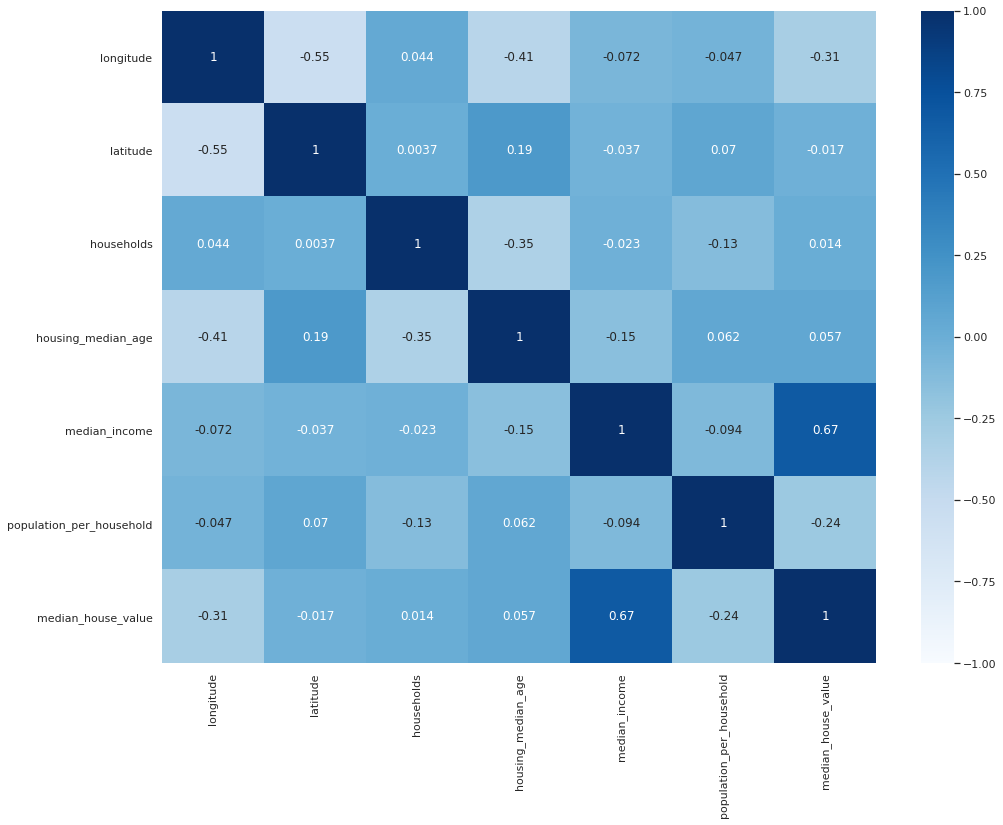

In [50]:
sns.heatmap(corr, cmap='Blues', vmin=-1, vmax=1, annot=True)

In [53]:
x = df.drop(["total_bedrooms","population","total_rooms","population_per_household","median_house_value"], axis=1).values
y = df['median_house_value'].values

In [54]:
# テスト用とデータを分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

# 予測モデル作成
lr.fit(x_train, y_train)
 
# 偏回帰係数
coef = pd.DataFrame({"Name":["longitude","latitude","households","housing_median_age","population_per_household","median_income"], "Coefficients":lr.coef_}).sort_values(by='Coefficients')

# 偏回帰係数
print("【偏回帰係数】", coef)
 
# 切片 (誤差)
print("切片:", lr.intercept_)

# 決定係数（トレーニングデータ）
print("決定係数(訓練):", lr.score(x_train, y_train))

# 決定係数（テストデータ）
print("決定係数(テスト):", lr.score(x_test, y_test))

【偏回帰係数】                        Name  Coefficients
0                 longitude -62592.913397
1                  latitude -38062.792137
5             median_income -23432.372040
3        housing_median_age      9.875207
2                households    620.772684
4  population_per_household  36208.023338
切片: -5969670.192502882
決定係数(訓練): 0.6009373311100594
決定係数(テスト): 0.5386695854610337
